In [1]:
import os
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import scipy.stats as stats

warnings.filterwarnings('ignore', category=FutureWarning)

filename = 'coffee_ratings.csv'

if os.path.exists(filename):
  
    df = pd.read_csv(filename)
else:
   
    url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-07/coffee_ratings.csv'
    response = requests.get(url)
    
    if response.status_code == 200:
        df = pd.read_csv(url)
        df.to_csv(filename, index=False) 
    else:
        print('Error opening file:', response.status_code)
        exit()

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_cup_points       1339 non-null   float64
 1   species                1339 non-null   object 
 2   owner                  1332 non-null   object 
 3   country_of_origin      1338 non-null   object 
 4   farm_name              980 non-null    object 
 5   lot_number             276 non-null    object 
 6   mill                   1021 non-null   object 
 7   ico_number             1180 non-null   object 
 8   company                1130 non-null   object 
 9   altitude               1113 non-null   object 
 10  region                 1280 non-null   object 
 11  producer               1107 non-null   object 
 12  number_of_bags         1339 non-null   int64  
 13  bag_weight             1339 non-null   object 
 14  in_country_partner     1339 non-null   object 
 15  harv

In [6]:
df.describe()

,total_cup_points,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1338.000000,1339.000000,1109.000000,1109.000000,1109.000000
mean,82.089851,154.182972,7.566706,7.520426,7.401083,7.535706,7.517498,7.518013,9.834877,9.835108,9.856692,7.503376,0.088379,0.479462,0.173393,3.556385,1750.713315,1799.347775,1775.030545
std,3.500575,129.987162,0.377560,0.398442,0.404463,0.379827,0.370064,0.408943,0.554591,0.763946,0.616102,0.473464,0.048287,2.549683,0.832121,5.312541,8669.440545,8668.805771,8668.626080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,81.080000,14.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,82.500000,175.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,83.670000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,90.580000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,0.280000,63.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


In [7]:
df.isnull().sum()

total_cup_points            0
species                     0
owner                       7
country_of_origin           1
farm_name                 359
lot_number               1063
mill                      318
ico_number                159
company                   209
altitude                  226
region                     59
producer                  232
number_of_bags              0
bag_weight                  0
in_country_partner          0
harvest_year               47
grading_date                0
owner_1                     7
variety                   226
processing_method         170
aroma                       0
flavor                      0
aftertaste                  0
acidity                     0
body                        0
balance                     0
uniformity                  0
clean_cup                   0
sweetness                   0
cupper_points               0
moisture                    0
category_one_defects        0
quakers                     1
color     

In [8]:
res1=df.groupby(['country_of_origin']).sum('number_of_bags').sort_values(by='number_of_bags',ascending=False).head(10)
res1

,total_cup_points,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
country_of_origin,,,,,,,,,,,,,,,,,,,
Colombia,15208.50,41204,1400.51,1390.27,1377.02,1383.48,1392.54,1410.64,1818.00,1820.00,1821.34,1394.56,11.35,69,38.0,355,227346.0000,248346.0000,237846.0000
Guatemala,14814.23,36868,1365.62,1355.51,1315.30,1374.95,1353.11,1352.05,1783.30,1789.97,1786.63,1337.79,18.51,34,50.0,619,600213.8248,604187.7608,602200.7928
Brazil,10877.58,30534,997.01,999.71,982.15,991.51,995.88,994.16,1304.81,1300.66,1313.32,998.31,10.87,17,59.0,475,106047.0000,107475.0000,106761.0000
Mexico,19090.06,24140,1759.99,1741.45,1705.82,1753.09,1741.79,1729.57,2299.60,2279.32,2353.34,1726.27,26.81,199,9.0,1600,285879.0000,287329.0000,286604.0000
Honduras,4205.95,13167,386.50,383.41,374.26,383.38,383.68,379.69,511.33,510.67,512.00,381.05,5.71,3,10.0,189,72696.0000,72696.0000,72696.0000
Ethiopia,3761.30,11761,347.44,352.40,347.33,353.92,348.66,350.78,434.65,437.99,433.99,354.14,3.65,11,16.0,227,51052.2800,56965.7600,54009.0200
Costa Rica,4222.24,10354,391.24,384.40,384.26,386.27,384.41,389.50,502.67,503.33,505.33,390.84,4.25,18,6.0,144,62132.6000,64839.8000,63486.2000
Nicaragua,2091.91,6406,190.56,190.24,187.25,188.93,192.42,189.24,254.66,254.00,255.33,189.25,2.80,7,8.0,72,127900.0000,129225.0000,128562.5000
Uganda,3004.27,5477,283.83,279.10,274.41,277.51,277.92,275.85,360.00,360.00,337.08,278.59,4.09,14,5.0,129,52163.0000,56013.0000,54088.0000


In [9]:
res1.columns

Index(['total_cup_points', 'number_of_bags', 'aroma', 'flavor', 'aftertaste',
       'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness',
       'cupper_points', 'moisture', 'category_one_defects', 'quakers',
       'category_two_defects', 'altitude_low_meters', 'altitude_high_meters',
       'altitude_mean_meters'],
      dtype='object')

In [55]:
df.duplicated().sum()

0

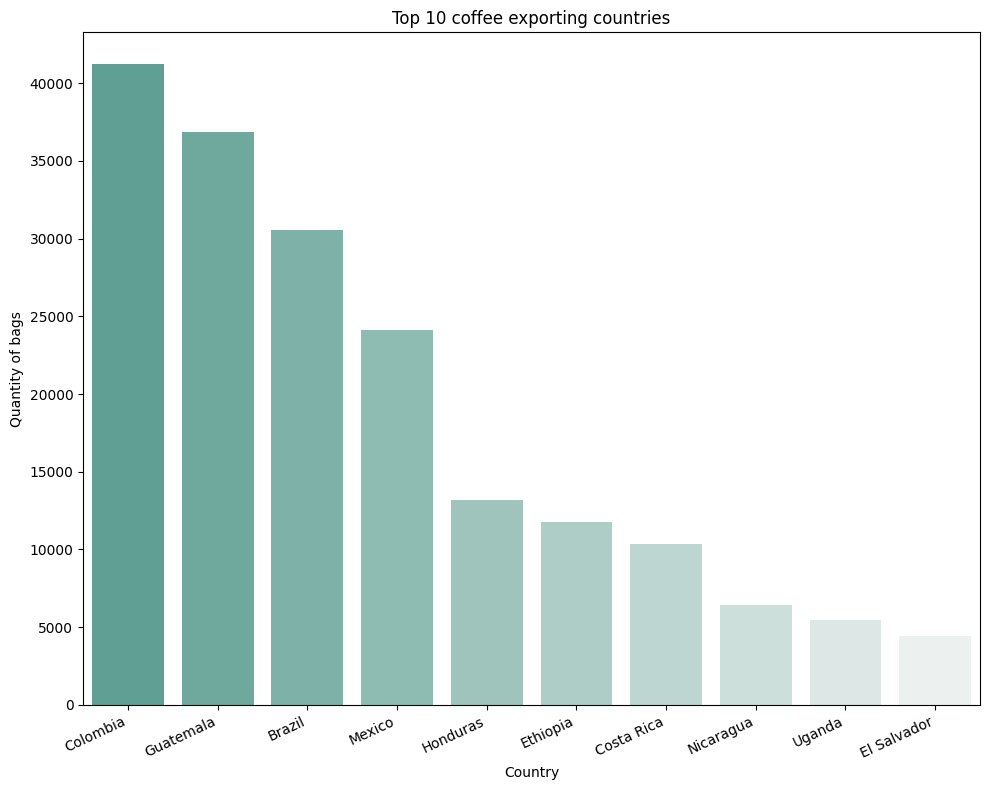

<Axes: title={'center': 'Top 10 coffee exporting countries'}, xlabel='Country', ylabel='Quantity of bags'>

In [10]:
plt.figure(figsize=(10, 8))
custom_palette = sns.color_palette('light:#5A9', n_colors=len(res1))
custom_palette = custom_palette[::-1]
ax = sns.barplot(x=res1.index, y='number_of_bags', data=res1, palette=custom_palette)
plt.xlabel('Country')
plt.ylabel('Quantity of bags')
plt.title('Top 10 coffee exporting countries')
plt.xticks(rotation=25, ha='right') 
plt.tight_layout()  
plt.show()



In [50]:
column_for_matrix = ['body', 'acidity', 'flavor', 'aroma', 'sweetness', 'cupper_points', 'aftertaste', 'balance',
                     'uniformity', 'clean_cup', 'total_cup_points']


corr_matrix = df[column_for_matrix].corr(method='pearson')

threshold=0.65


filtered_corr_matrix = corr_matrix.drop(['sweetness', 'uniformity', 'clean_cup','cupper_points'], axis=0)
filtered_corr_matrix = filtered_corr_matrix.drop(['sweetness', 'uniformity', 'clean_cup','cupper_points'], axis=1)

res=filtered_corr_matrix[abs(filtered_corr_matrix) > threshold]



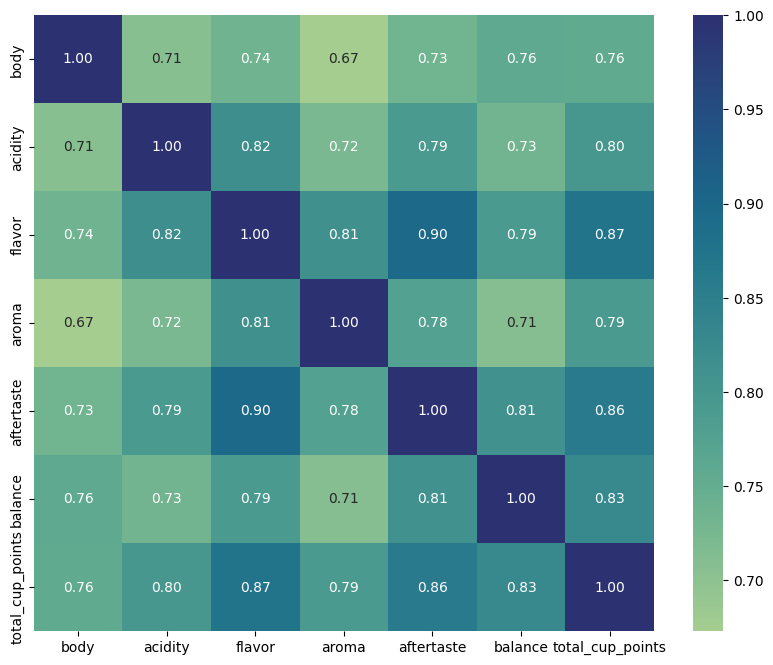

In [103]:
plt.figure(figsize=(10, 8))
corr_matrix = df.loc[:, column_for_matrix].corr()
sns.heatmap(res, annot=True, fmt='.2f', cmap="crest")
plt.show()

In [91]:
res4=df.groupby(['species','color'])['total_cup_points'].mean()

res4_df = res4.reset_index().sort_values(by='total_cup_points',ascending=True)

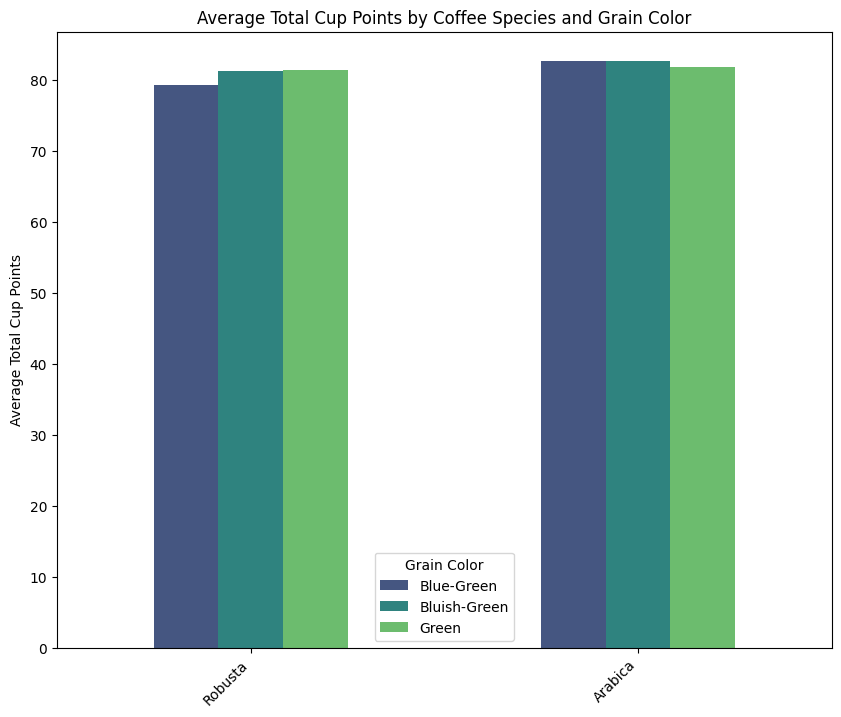

In [99]:
plt.figure(figsize=(10, 8))
sns.barplot(data=res4_df, x='species', y='total_cup_points', hue='color', palette="viridis",width=0.5)
plt.title('Average Total Cup Points by Coffee Species and Grain Color')
plt.xlabel('')
plt.ylabel('Average Total Cup Points')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Grain Color')

In [3]:
by_country=df.groupby(['country_of_origin'])['total_cup_points'].mean().sort_values(ascending=False)

by_country

country_of_origin
Papua New Guinea                85.750000
Ethiopia                        85.484091
Japan                           84.670000
United States                   84.433000
Kenya                           84.309600
Panama                          83.707500
Uganda                          83.451944
Colombia                        83.106557
El Salvador                     83.052857
China                           82.927500
Rwanda                          82.830000
Costa Rica                      82.789020
Thailand                        82.573750
Indonesia                       82.565500
Peru                            82.526000
Brazil                          82.405909
Tanzania, United Republic Of    82.369500
Taiwan                          82.001333
Zambia                          81.920000
Guatemala                       81.846575
Laos                            81.833333
Burundi                         81.830000
United States (Hawaii)          81.820411
United States (P

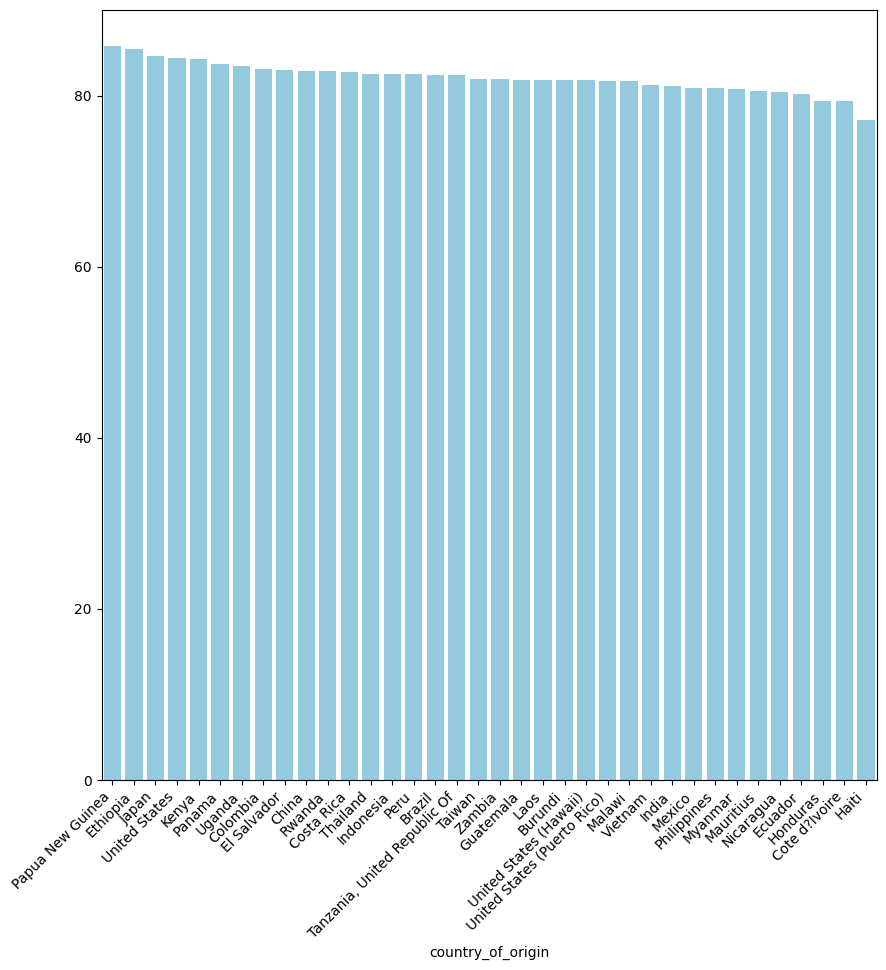

In [13]:
from scipy.stats import spearmanr

plt.figure(figsize=(10, 10))
sns.barplot(x=by_country.index, y=by_country.values, color='skyblue')

plt.xticks(rotation=45, ha='right')  

correlation, p_value = spearmanr(by_country.index,by_country.values)

In [14]:
print("Spearman's correlation coefficient:", correlation)

Spearman's correlation coefficient: 0.03938223938223938
